In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
path = path = r"C:\Users\Allala Rishik\OneDrive\Desktop\traffic\Dataset\Dataset"
file_path = r"C:\Users\Allala Rishik\OneDrive\Desktop\traffic\labels.csv"
labels_df = pd.read_csv(file_path)
batch_size_val=32 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    
validationRatio = 0.2

In [58]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)
print(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
[ 0  0  0 ... 42 42 42]


In [59]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
data=pd.read_csv(file_path)
print("data shape ",data.shape,type(data))

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)
data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [60]:
num_of_samples = []
cols = 5
num_classes = noOfClasses

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img

In [61]:
 
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))


X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
 
 
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)
 

y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [62]:
def myModel():
    model= Sequential()
    model.add((Conv2D(60,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(60, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add((Conv2D(30, (3,3),activation='relu')))
    model.add((Conv2D(30, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

C:\Users\Allala Rishik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


C:\Users\Allala Rishik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


695/695 ━━━━━━━━━━━━━━━━━━━━ 68s 90ms/step - accuracy: 0.1550 - loss: 3.1300 - val_accuracy: 0.7949 - val_loss: 0.7214
Epoch 2/10
  1/695 ━━━━━━━━━━━━━━━━━━━━ 52s 76ms/step - accuracy: 0.6250 - loss: 1.2180

C:\Users\Allala Rishik\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


695/695 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6250 - loss: 1.2180 - val_accuracy: 0.7920 - val_loss: 0.7227
Epoch 3/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5824 - loss: 1.3738 - val_accuracy: 0.9151 - val_loss: 0.2948
Epoch 4/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.2846 - val_accuracy: 0.9219 - val_loss: 0.2907
Epoch 5/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.7159 - loss: 0.9157 - val_accuracy: 0.9555 - val_loss: 0.2261
Epoch 6/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.8213 - val_accuracy: 0.9524 - val_loss: 0.2276
Epoch 7/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7797 - loss: 0.7157 - val_accuracy: 0.9565 - val_loss: 0.1466
Epoch 8/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.7091 - val_accuracy: 0.9503 - val_loss: 0.1611
Epoch 9/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.8162 - loss: 0.5885 - val_accuracy: 0.973

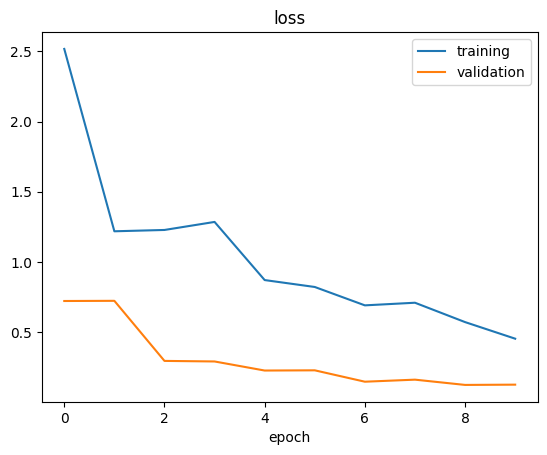

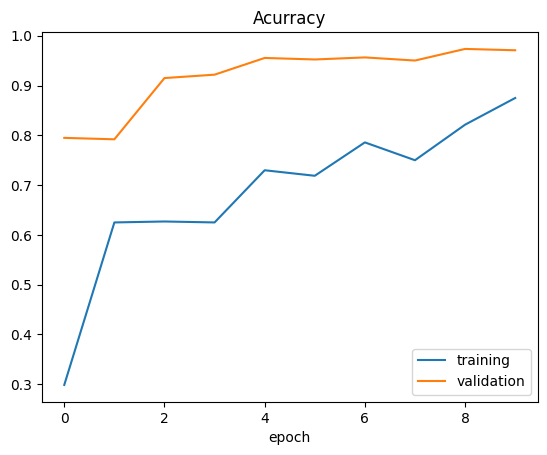

Test Score: 0.13138672709465027
Test Accuracy: 0.9686781764030457


In [63]:
 
model = myModel()
print(model.summary())
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=len(X_train) // batch_size_val,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=True
)

 
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
model.save("model.h5")

In [64]:
model.evaluate(X_test,y_test)

218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9710 - loss: 0.1362


[0.13138672709465027, 0.9686781764030457]

In [65]:
predictions  = model.predict(X_test)

218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [66]:
predictions[:1]

array([[3.8149696e-17, 1.8485852e-13, 2.2345938e-08, 1.8827264e-07,
        5.3982121e-14, 3.4733977e-05, 7.3262474e-17, 2.6108854e-08,
        1.4079862e-12, 4.2268905e-08, 9.9993289e-01, 5.7099525e-10,
        1.4034846e-08, 3.1212560e-10, 1.9278738e-11, 5.4753060e-12,
        8.4844687e-10, 1.6109270e-08, 3.5211742e-15, 6.8569463e-11,
        5.9322885e-12, 3.4271582e-07, 1.9071982e-15, 2.2665030e-09,
        5.7767541e-17, 1.3310670e-13, 6.2974138e-15, 6.2201039e-16,
        1.1707550e-13, 8.4537934e-14, 4.0704224e-12, 2.4352931e-09,
        4.3079442e-18, 8.8709964e-14, 4.4352344e-10, 8.9328432e-12,
        1.3468851e-10, 2.1100042e-12, 3.1563130e-05, 7.3578119e-17,
        3.4040792e-09, 6.0292781e-14, 6.9636364e-08]], dtype=float32)

In [67]:
abcd = y_test.reshape(-1,)
abcd[:1]

array([0.])

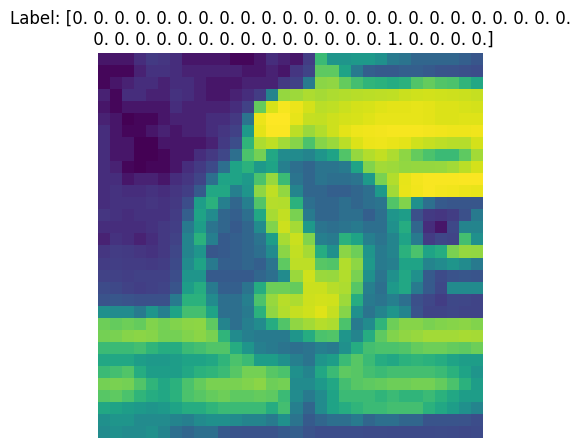

In [68]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    """
    Plots a sample image and its corresponding label.
    
    Parameters:
    X: Array of images.
    y: Array of labels.
    index: Index of the sample to plot.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(X[index])
    plt.title(f"Label: {y[index]}")
    plt.axis('off')
    plt.show()

# Now you can call the function like this:
plot_sample(X_test, y_test, 1)

In [69]:
y_cls = [np.argmax(ele) for ele in predictions]
y_cls[:5]

[10, 38, 38, 5, 25]

In [72]:
# Load the CSV file into a DataFrame


# Create a dictionary that maps class indices to labels
labels_dict = pd.Series(labels_df.Name.values, index=labels_df.ClassId).to_dict()



# Get the indices of the max probabilities (i.e., the predicted class indices)
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted class indices to their original labels using labels_dict
predicted_labels = [labels_dict.get(idx, "Unknown label") for idx in predicted_class_indices]

print(predicted_class_indices)
print(predicted_labels[98])


[10 38 38 ... 12  5 13]
Speed limit (70km/h)
